<a href="https://colab.research.google.com/github/taleshrocha/Best-README-Template/blob/master/dados_c1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('2021-2.csv')
#data['nota'] = data['nota'].str.replace(',', '.').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   presencas  61 non-null     int64  
 1   nota       61 non-null     float64
 2   situacao   61 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
# Create idAssiduo and jaFoi column.
data['isAssiduo'] = data['presencas'] >= 5
data['jaFoi'] = data['presencas'] >= 1

In [ ]:
data.head()

,presencas,nota,situacao,isAssiduo,jaFoi
0,0,2.7,REP,False,False
1,0,2.9,REMF,False,False
2,0,6.2,APRN,False,False
3,1,3.0,REC,False,True
4,0,6.5,APRN,False,False


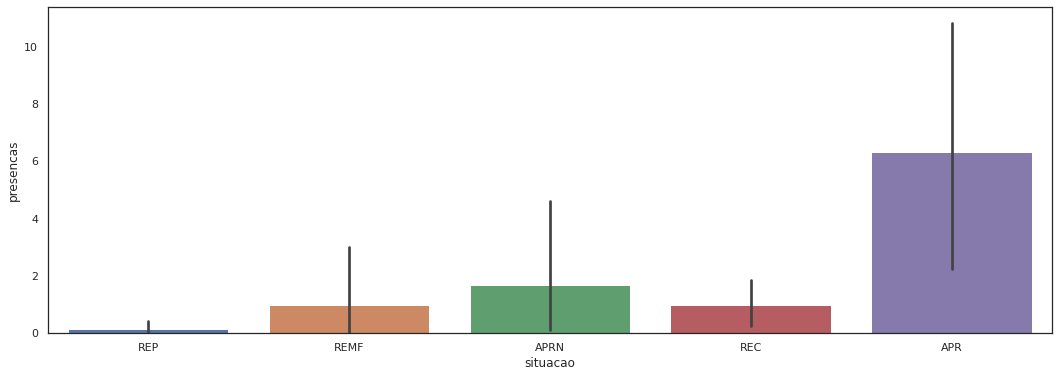

In [ ]:
sns.barplot(data=data, x="situacao", y="presencas")

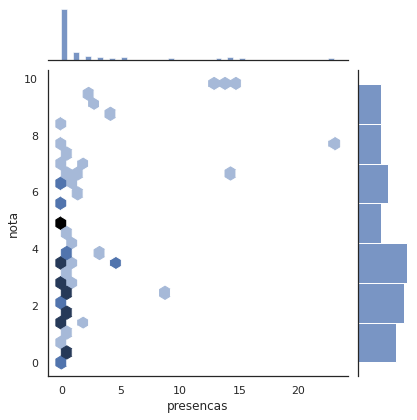

In [ ]:
sns.jointplot(
    x='presencas',
    y='nota',
    data=data,
    kind='hex' # or 'scatter' or 'kde' or 'hex'
)

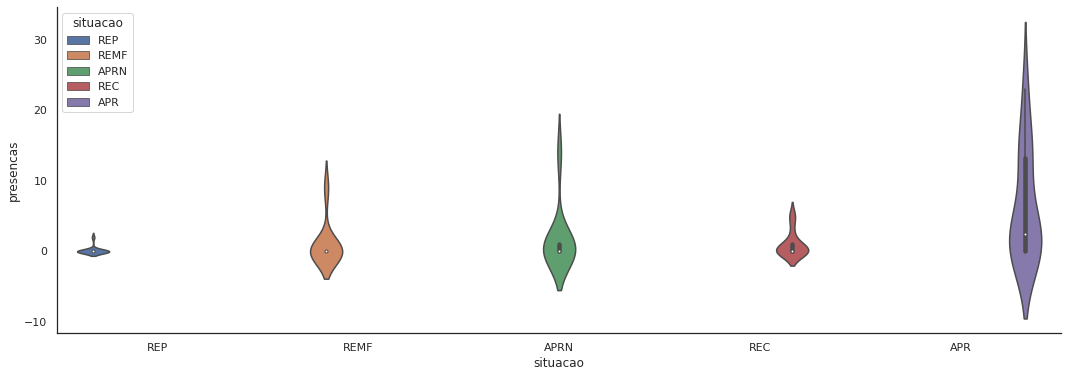

In [ ]:
#plt.ylim(0, 15)
sns.set(
    rc={'figure.figsize':(18,6)}, 
    style="white"
)
sns.violinplot(
    x='situacao',
    y='presencas',
    hue='situacao',
    data=data
)
sns.despine()

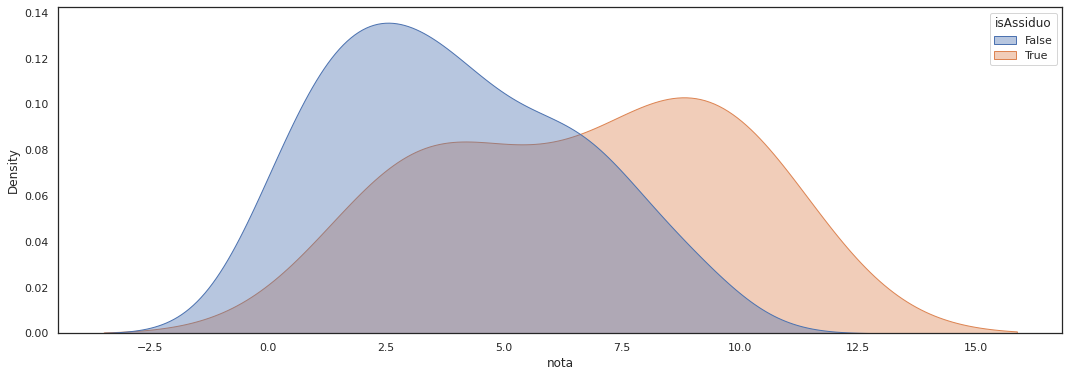

In [ ]:
sns.kdeplot(data=data, x="nota", hue="isAssiduo", fill=True, common_norm=False, alpha=0.4)

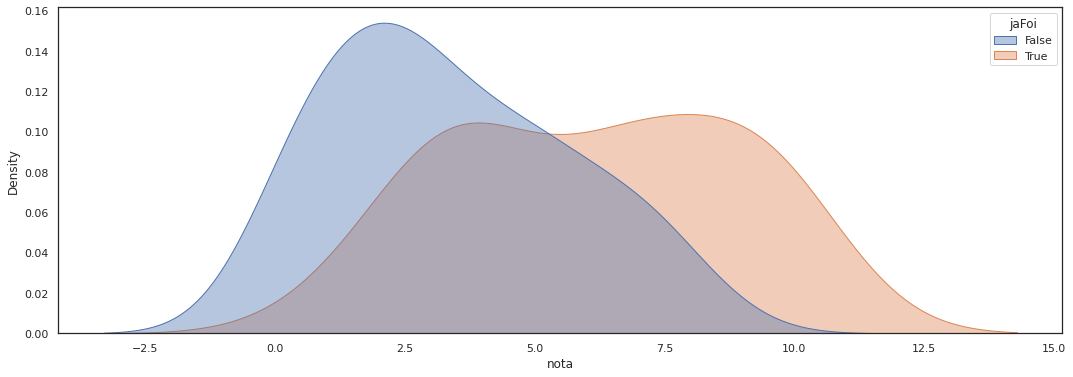

In [ ]:
sns.kdeplot(data=data, x="nota", hue="jaFoi", fill=True, common_norm=False, alpha=0.4)

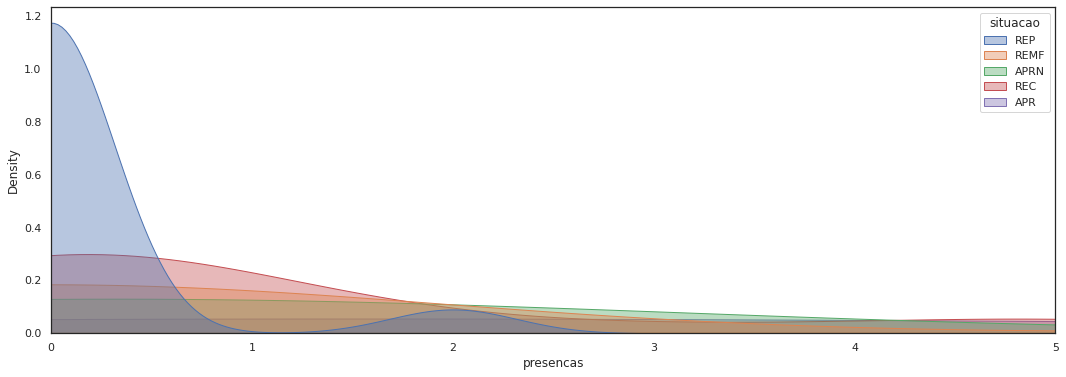

In [ ]:
sns.set(
    rc={'figure.figsize':(18,6)}, 
    style="white"
)
plt.xlim(0, 5)
sns.kdeplot(data=data, x="presencas", hue="situacao", fill=True, common_norm=False, alpha=0.4)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


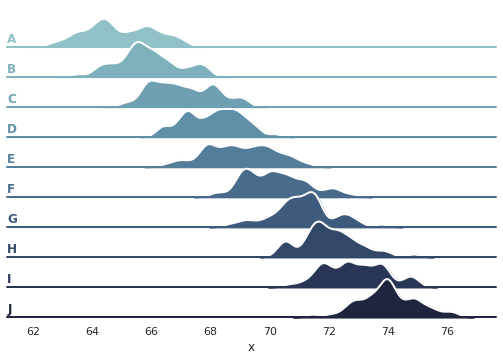

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)